# Oyster Detection Notebook

This notebook is supplementary material to the following paper:




In [1]:
# Download and install Yolov5
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

--2024-04-23 14:03:12--  https://rsg.pml.ac.uk/shared_files/dmof/OysterDetection/yolo5s_trained_best.pt
Resolving rsg.pml.ac.uk (rsg.pml.ac.uk)... 192.171.164.182
Connecting to rsg.pml.ac.uk (rsg.pml.ac.uk)|192.171.164.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14454389 (14M)
Saving to: ‘yolo5s_trained_best.pt’

yolo5s_trained_best 100%[===================>]  13.78M  13.1MB/s    in 1.1s    

2024-04-23 14:03:14 (13.1 MB/s) - ‘yolo5s_trained_best.pt’ saved [14454389/14454389]



In [1]:
# Download the trained oyster detection model and a test image, taken from our validation data.
!wget https://rsg.pml.ac.uk/shared_files/dmof/OysterDetection/yolo5s_trained_best.pt
!wget https://rsg.pml.ac.uk/shared_files/dmof/OysterDetection/test_img_1.tif

--2024-04-23 14:14:00--  https://rsg.pml.ac.uk/shared_files/dmof/OysterDetection/yolo5s_trained_best.pt
Resolving rsg.pml.ac.uk (rsg.pml.ac.uk)... 192.171.164.182
Connecting to rsg.pml.ac.uk (rsg.pml.ac.uk)|192.171.164.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14454389 (14M)
Saving to: ‘yolo5s_trained_best.pt.1’

yolo5s_trained_best 100%[===================>]  13.78M  13.0MB/s    in 1.1s    

2024-04-23 14:14:02 (13.0 MB/s) - ‘yolo5s_trained_best.pt.1’ saved [14454389/14454389]

--2024-04-23 14:14:02--  https://rsg.pml.ac.uk/shared_files/dmof/OysterDetection/test_img_1.tif
Resolving rsg.pml.ac.uk (rsg.pml.ac.uk)... 192.171.164.182
Connecting to rsg.pml.ac.uk (rsg.pml.ac.uk)|192.171.164.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1640078 (1.6M) [image/tiff]
Saving to: ‘test_img_1.tif’

test_img_1.tif      100%[===================>]   1.56M  3.00MB/s    in 0.5s    

2024-04-23 14:14:03 (3.00 MB/s) - ‘test_img_1.tif’ sa

In [8]:
# Use the Yolov5 detection script to make a prediction on our test image
!python yolov5/detect.py --weights yolo5s_trained_best.pt --source test_img_1.tif

detect: weights=['yolo5s_trained_best.pt'], source=test_img_1.tif, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_img_1.tif: 640x640 5 oysters, 460.9ms
Speed: 8.3ms pre-process, 460.9ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


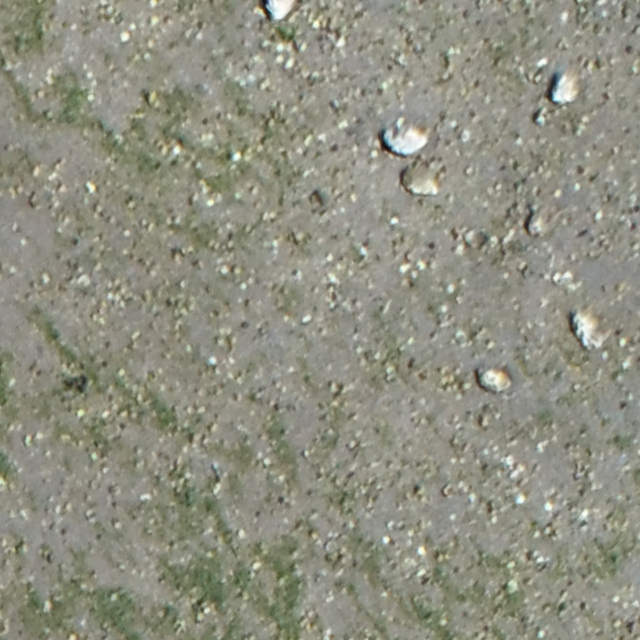

In [19]:
# Show the test image we are using
from PIL import Image
orig_img = Image.open(f'test_img_1.tif')
orig_img

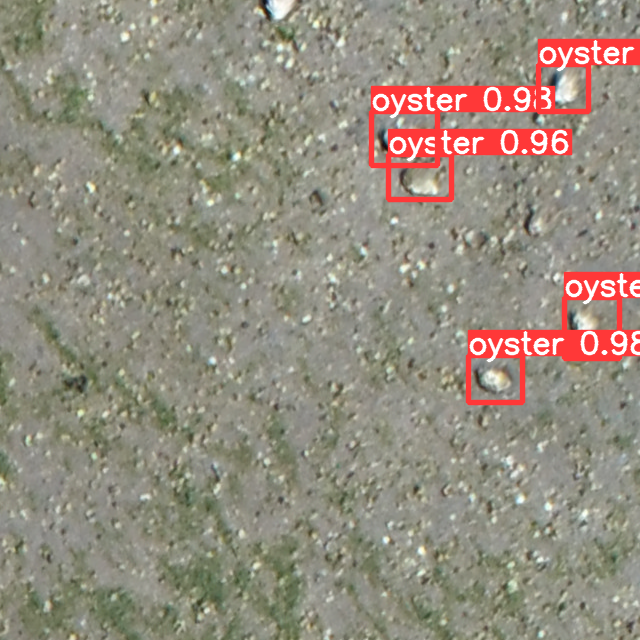

In [15]:
# Now show the prediction make by the Yolo model
pred_img = Image.open(f'yolov5/runs/detect/exp/test_img_1.tif')
pred_img